# BT03: Linear Regression

TODO: Võ Phương Hòa - 1412192

---

## Tổng thể

**Cách làm bài**

Bạn sẽ làm trực tiếp trên file notebook này; trong file, mình đã để từ `TODO` để cho biết những chỗ mà bạn cần phải làm (trong đó, `TODO` đầu tiên là bạn phải ghi họ tên và MSSV vào phần đầu của file). Trong khi làm bài, thường xuyên `Ctrl + S` để lưu lại bài làm của bạn, tránh mất mát thông tin.

Nên nhớ mục tiêu chính ở đây là *học, học một cách chân thật*. Bạn có thể thảo luận ý tưởng với bạn khác cũng như là tham khảo các tài liệu, nhưng *code và bài làm phải là của bạn, dựa trên sự hiểu của bạn*. Nếu vi phạm thì sẽ bị 0 điểm cho toàn bộ môn học.

**Cách nộp bài**

Trước khi nộp bài, bạn chọn `Kernel` -> `Restart & Run All` (restart python và chạy tất cả các cell), rồi kiểm tra xem có bị lỗi gì không.

Sau đó, trong thư mục `MSSV` (vd, nếu bạn có MSSV là 1234567 thì bạn đặt tên thư mục là `1234567`) bạn đặt file `BT03-LinearRegression.ipynb` (không cần nộp file dữ liệu), rồi nén thư mục `MSSV` này lại và nộp ở link trên moodle.

**Nội dung bài tập**

Trong bài này, bạn sẽ cài đặt mô hình Linear Regression để dự đoán giá rượu (ví dụ ở trên lớp). 


## Import

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# You can also import other things ...

## Hàm huấn luyện Linear Regression

In [2]:
def train_linear_regression(X, Y):
    '''
    Trains Linear Regression on the dataset (X, Y).
    
    Parameters
    ----------
    X : numpy array, shape (N, d + 1)
        The matrix of input vectors (each row corresponds to an input vector); 
        the first column of this matrix is all ones (corresponding to x_0).
    Y : numpy array, shape (N, 1)
        The vector of outputs.
    
    Returns
    -------
    w : numpy array, shape (d + 1, 1)
        The vector of parameters of Linear Regression after training.
    '''
    # TODO
    w = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(Y)
    
    return w

## Hàm tính độ đo $R^2$

In [3]:
def compute_squared_R(w, baseline_prediction, X, Y):
    '''
    Computes R^2 of the hypothesis corresponding to w on the dataset (X, Y).
    
    Parameters
    ----------
    w : numpy array, shape (d + 1, 1)
        The vector of parameters of Linear Regression.
    baseline_prediction : float
        The prediction of baseline model.
    X : numpy array, shape (N, d + 1)
        The matrix of input vectors (each row corresponds to an input vector); 
        the first column of this matrix is all ones (corresponding to x_0).
    Y : numpy array, shape (N, 1)
        The vector of outputs.
    
    Returns
    -------
    squared_R : float
        R^2 of the hypothesis corresponding to w on the dataset (X, Y).
    '''
    # TODO
    error_learning_model = 0.0
    error_baseline = 0.0
    for i in range(len(X)):
        error_learning_model += (w.T.dot(X[i]) - Y[i]) ** 2
        error_baseline += (baseline_prediction - Y[i]) ** 2
      
    # mse_learning_model = error_learning_model / len(X)
    # mse_baseline = error_baseline / len(X)
    # squared_R = 1 - mse_learning_model / mse_baseline
    
    # This is enough!
    # Because, error_learning_model / error_baseline = mse_learning_model / mse_baseline
    squared_R = 1 - error_learning_model / error_baseline
    
    return squared_R

## Chạy

**1.** Đọc dữ liệu

**1.1.** Đọc tập huấn luyện

In [4]:
wine = pd.DataFrame.from_csv('wine.csv')
wine.head()

,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
Year,,,,,,
1952-01-01,7.4950,600,17.1167,160,31,43183.569
1953-01-01,8.0393,690,16.7333,80,30,43495.030
1955-01-01,7.6858,502,17.1500,130,28,44217.857
1957-01-01,6.9845,420,16.1333,110,26,45152.252
1958-01-01,6.7772,582,16.4167,187,25,45653.805


In [5]:
wine.shape

(25, 6)

In [6]:
wine.dtypes

Price          float64
WinterRain       int64
AGST           float64
HarvestRain      int64
Age              int64
FrancePop      float64
dtype: object

In [7]:
wine.describe()

,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,7.067224,605.280000,16.509336,148.560000,17.200000,49694.436760
std,0.650341,132.277965,0.675397,74.419464,7.691987,3665.270243
min,6.204900,376.000000,14.983300,38.000000,5.000000,43183.569000
25%,6.518800,536.000000,16.200000,89.000000,11.000000,46583.995000
50%,7.121100,600.000000,16.533300,130.000000,17.000000,50254.966000
75%,7.495000,697.000000,17.066700,187.000000,23.000000,52894.183000
max,8.493700,830.000000,17.650000,292.000000,31.000000,54602.193000


**1.2.** Đọc tập kiểm tra

Để đánh giá chất lượng của hàm dự đoán học được, ta sẽ đo độ lỗi hoặc độ chính xác của hàm dự đoán này trên một tập dữ liệu ngoài tập huấn luyện, gọi là tập kiểm tra (test set). *Lưu ý: tập kiểm tra này không được dính dánh gì đến quá trình học.*

In [8]:
wine_test = pd.DataFrame.from_csv('wine_test.csv')
wine_test

,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
Year,,,,,,
1979-01-01,6.9541,717,16.1667,122,4,54835.832
1980-01-01,6.4979,578,16.0000,74,3,55110.236


**2.** Trực quan hóa Linear Regression với trường hợp input chỉ có một đặc trưng là AGST (Average Growing Season Temperature)

In [9]:
# Construct X and Y
X = wine['AGST'].values.astype(np.float64).reshape(len(wine), 1)
X = np.hstack((np.ones((len(X), 1)), X))
Y = wine['Price'].values.astype(np.float64).reshape(len(wine), 1)
print 'X.shape =', X.shape
print 'Y.shape =', Y.shape

X.shape = (25L, 2L)
Y.shape = (25L, 1L)


(14.5, 18.0)

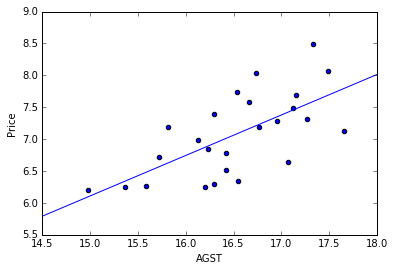

In [10]:
# Train Linear Regression
w = train_linear_regression(X, Y)

# Visualize result
wine.plot(x='AGST', y='Price', kind='scatter')
x_min, x_max = plt.xlim()
xs = np.array([x_min, x_max]).reshape(-1, 1)
ones_added_xs = np.hstack((np.ones((len(xs), 1)), xs))
predicted_ys = ones_added_xs.dot(w)
plt.plot(xs, predicted_ys)
plt.xlim(x_min, x_max)

Mình có đính kèm kết quả chạy của mình trong file `result1.png`.

**3.** Huấn luyện và kiểm tra Linear Regression với input:
- Có một đặc trưng là AGST.
- Có hai đặc trưng là AGST, Harvest Rain.
- Có ba đặc trưng là AGST, Harvest Rain, Age.
- Có bốn đặc trưng là AGST, Harvest Rain, Age, Winter Rain.
- Có năm đặc trưng là AGST, Harvest Rain, Age, Winter Rain, Population.

In [11]:
# Compute predicted value of baseline model
baseline_prediction = Y.mean()

# Construct test_Y
test_Y = wine_test['Price'].values.astype(np.float64).reshape(-1, 1)

# Train and test Linear Regression with increasing feature set
features = ['AGST', 'HarvestRain', 'Age', 'WinterRain', 'FrancePop']
print "%57s %9s %8s" %('USED FEATURES', 'TRAIN R^2', 'TEST R^2')
for i in range(len(features)):
    # Construct X and test_X
    used_features = features[0:i+1]
    X = wine[used_features].values.astype(np.float64).reshape(len(wine), -1)
    X = np.hstack((np.ones((len(X), 1)), X))
    test_X = wine_test[used_features].values.astype(np.float64).reshape(len(wine_test), -1)
    test_X = np.hstack((np.ones((len(test_X), 1)), test_X))
    
    # Train Linear Regression
    w = train_linear_regression(X, Y)
    train_squared_R = compute_squared_R(w, baseline_prediction, X, Y)
       
    # Test Linear Regression
    test_squared_R = compute_squared_R(w, baseline_prediction, test_X, test_Y)
    
    # Print results
    print "%57s %9.3f %8.3f" %(used_features, train_squared_R, test_squared_R)

                                            USED FEATURES TRAIN R^2 TEST R^2
                                                 ['AGST']     0.435    0.788
                                  ['AGST', 'HarvestRain']     0.707   -0.082
                           ['AGST', 'HarvestRain', 'Age']     0.790    0.534
             ['AGST', 'HarvestRain', 'Age', 'WinterRain']     0.829    0.794
['AGST', 'HarvestRain', 'Age', 'WinterRain', 'FrancePop']     0.829    0.757


Mình có đính kèm kết quả chạy của mình trong file `result2.png`.

Bình luận về kết quả:

TODO
1. Trên bộ huấn luyện, tỉ lệ dự đoán chính xác tăng dần theo lượng thông tin (tăng dần thuộc tính), trừ trường hợp cuối khi bổ sung thêm thuộc tính 'FrancePop' thì kết quả không đổi do thuộc tính này không ảnh hưởng đến chất lượng dự đoán.
2. Trên bộ test, kết quả nhìn chung chấp nhận được (3/5 kết quả cho tỉ lệ >75%, 1/5 kết quả cho tỉ lệ >50%), trong đó kết quả tốt nhất thu được khi xét trên 4 thuộc tính 'AGST', 'HarvestRain', 'Age', 'WinterRain'. Một trường hợp ngoại lệ, đúng hơn là không khả quan khi cho kết quả là số âm.
3. Khi so sánh kết quả trên bộ test với bộ huấn luyện, về tổng quan thì khi thông tin được xét càng nhiều (nhiều thuộc tính hơn), thì độ chênh lệch giữa kết quả thu được từ bộ test với bộ huấn luyện tương đối thấp.